<h1><center>Predict an employee leaving the company</center></h1>

<img src="https://www.teamly.com/blog/wp-content/uploads/2022/06/Types-of-Employee-Attrition.png">

Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company. 
Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.


Data has been split into two groups and provided in the module:
1. training set 
2. test set 

The training set is used to build your machine learning model. 

The test set should be used to see how well your model performs on unseen data.

####       This is a Classification Supervised Learning, Where the label / Dependent / Target variable is Attrition

<h2><center>Importing Basic Libraries</center></h2>

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

<h2><center>Load Dataset</center></h2>

In [236]:
# train dataset is used to train the model
train = pd.read_csv("Train_Dataset.csv")

# test dataset is used to predict whether an employee leave the company or not 
test = pd.read_csv("Test_Dataset.csv")

In [237]:
submission = pd.DataFrame(test['EmployeeID'])

In [238]:
train.head(3)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0


In [239]:
test.head(3)

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,Executive,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,Executive,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,Executive,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0


In [240]:
# Number of rows and columns in train and test dataset

print(train.shape)
print(test.shape)

(7810, 22)
(2630, 21)


<h2><center>Data Preprocessing</center></h2>

### Check the dataset info

In [241]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

##### In train dataset, it shows that total number of entries are 7810. But, originally, the train dataset has 5180 entries. Hence, drop rows from 5181 to remaining.

In [242]:
# Considering only rows that has data in the entire row.
train=train.iloc[0:5180,::]

In [243]:
train.shape

(5180, 22)

In [244]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [245]:
train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [246]:
print(train.Gender.value_counts())
print(test.Gender.value_counts())

Male      3094
Female    1338
F          702
Name: Gender, dtype: int64
Male      1574
Female     682
F          344
Name: Gender, dtype: int64


In [247]:
train.MaritalStatus.value_counts()

Single      1776
Married     1614
Divorsed    1016
M            774
Name: MaritalStatus, dtype: int64

##### Replace 'F ' with Female in Gender column.

In [248]:
train['Gender'].replace('F','Female',inplace=True)
test['Gender'].replace('F','Female',inplace=True)

##### Replace 'M' with Married in MaritalStatus column.

In [249]:
train['MaritalStatus'].replace('M','Married',inplace=True)
test['MaritalStatus'].replace('M','Married',inplace=True)

##### Replace 'Divorsed' with 'Divorced' in MaritalStatus column

In [250]:
train['MaritalStatus'].replace('Divorsed','Divorced',inplace=True)
test['MaritalStatus'].replace('Divorsed','Dovirced',inplace=True)

In [251]:
# Drop EmployeeID column in train and test dataset
train.drop(['EmployeeID'],axis=1,inplace=True)
test.drop(['EmployeeID'],axis=1,inplace=True)

### Handle Null Values

In [252]:
train.shape

(5180, 21)

In [253]:
print(round(train.isnull().sum()/len(train)*100,2))
print(round(test.isnull().sum()/len(train)*100,2))

Attrition             0.00
Age                   6.10
TravelProfile         0.00
Department            2.39
HomeToWork            4.92
EducationField        0.00
Gender                0.89
HourlnWeek            5.54
Involvement           0.00
WorkLifeBalance       0.00
Designation           0.73
JobSatisfaction       0.00
ESOPs                 0.00
NumCompaniesWorked    0.00
OverTime              0.00
SalaryHikelastYear    3.26
WorkExperience        3.61
LastPromotion         1.35
CurrentProfile        6.00
MaritalStatus         0.00
MonthlyIncome         1.80
dtype: float64
Age                   2.74
TravelProfile         0.00
Department            1.12
HomeToWork            2.43
EducationField        0.00
Gender                0.58
HourlnWeek            2.63
Involvement           0.00
WorkLifeBalance       0.00
Designation           0.58
JobSatisfaction       0.00
ESOPs                 0.00
NumCompaniesWorked    0.00
OverTime              0.00
SalaryHikelastYear    1.81
WorkExperienc

In [254]:
# Split data into numerical and categorical columns
numerical_cols = train.select_dtypes(exclude='object').columns
numerical_cols = numerical_cols.drop(['Attrition'])
categorical_cols = train.select_dtypes(include='object').columns

In [255]:
##### There are null values in train and test dataset, let's impute them

from sklearn.impute import SimpleImputer

# Impute numerical columns
si_num = SimpleImputer(missing_values=np.nan,strategy='median')
train[numerical_cols] = si_num.fit_transform(train[numerical_cols])
test[numerical_cols] = si_num.fit_transform(test[numerical_cols])

# Impute Categorical columns
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train[categorical_cols] = si_cat.fit_transform(train[categorical_cols])
test[categorical_cols] = si_cat.fit_transform(test[categorical_cols])

In [256]:
test.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,No,Analytics,9.0,CA,Male,80.0,3.0,2.0,Executive,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,Single,16904.0
1,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1.0,3.0,Executive,1.0,1.0,2.0,1.0,18.0,2.0,1.0,3.0,Single,18994.0
2,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3.0,3.0,Executive,5.0,0.0,5.0,1.0,22.0,18.0,3.0,3.0,Married,18587.0
3,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5.0,2.0,Manager,3.0,0.0,4.0,1.0,17.0,5.0,3.0,3.0,Married,20559.0
4,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4.0,1.0,Senior Manager,5.0,1.0,4.0,0.0,20.0,9.0,1.0,7.0,Married,24991.0


In [257]:
# Convert Attrition from float to int
def convert_float_to_int(col,dataset):
    dataset[col] = dataset[col].astype('int')

In [258]:
train_float_cols = ['Attrition','ESOPs','Involvement','WorkLifeBalance','JobSatisfaction','NumCompaniesWorked','OverTime']
test_float_cols = ['ESOPs','Involvement','WorkLifeBalance','JobSatisfaction','NumCompaniesWorked','OverTime']
convert_float_to_int(train_float_cols,train)
convert_float_to_int(test_float_cols,test)

In [259]:
train.Attrition.value_counts().index.to_list()

[0, 1]

## Attrition Distribution

[0 1]


Text(0.5, 0.98, 'Employee Attrition')

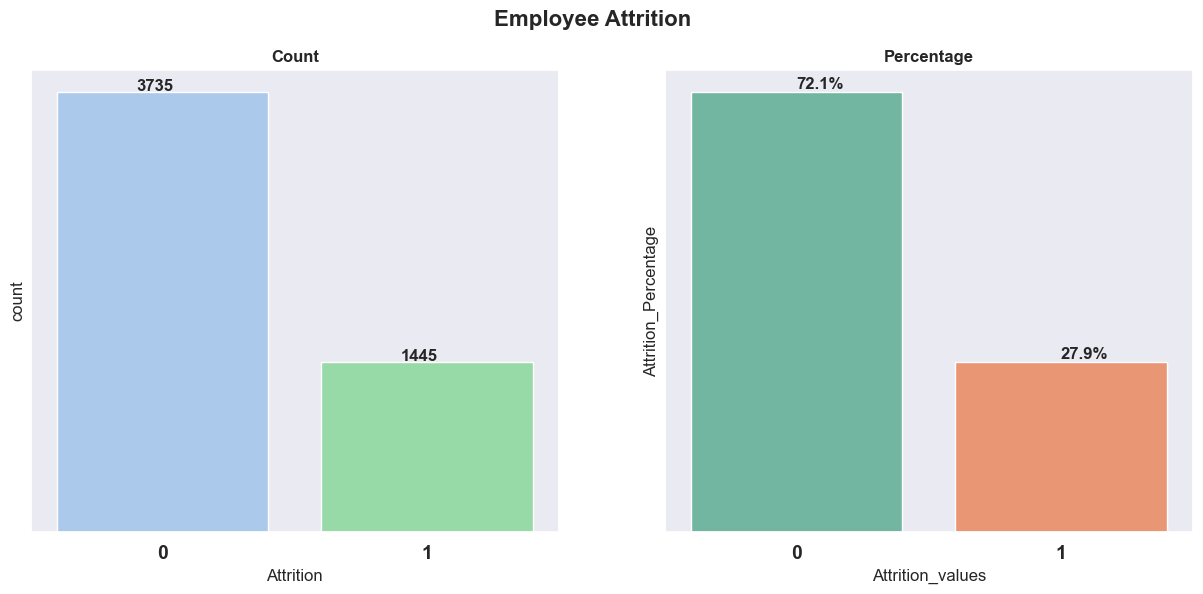

In [260]:
fig,ax=plt.subplots(1,2,figsize=(15,6),width_ratios=[1,1])
sns.countplot(train,x='Attrition',palette='pastel6',ax=ax[0])
sns.set_style('whitegrid',{'axes.grid':False})
for p,count in enumerate(train['Attrition'].value_counts().to_dict().values(),0):
    ax[0].text(p-0.1,count+10,count,fontweight='bold')
ax[0].set_xticklabels(labels=train.Attrition.value_counts().index.to_list(),fontweight='bold',fontsize=14)
ax[0].set_yticks([])
ax[0].set_title("Count",fontweight='bold',fontsize=12)


df = pd.DataFrame(train['Attrition'].value_counts())
df['Attrition_Percentage'] = round(df['Attrition']/len(train)*100,2)
df['Attrition_values'] = train['Attrition'].value_counts().to_dict().keys()
print(df['Attrition_values'].unique())
sns.barplot(data=df,x=df['Attrition_values'],y=df['Attrition_Percentage'],palette='Set2',ax=ax[1])
for p1,count1 in zip(df['Attrition_values'],df['Attrition_Percentage']):
    ax[1].text(p1,count1+0.5,str(count1)+'%',fontweight='bold')
ax[1].set_xticklabels(labels=df['Attrition_values'].unique(),fontweight='bold',fontsize=14)
ax[1].set_yticks([])
ax[1].set_title('Percentage',fontweight='bold',fontsize=12)
    
plt.suptitle("Employee Attrition",fontweight='bold',fontsize=16)

In [261]:
train.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,1,Executive,1,1,1,1,20.0,7.0,2.0,3.0,Married,18932.0
1,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,3,Executive,2,0,8,0,20.0,4.0,1.0,3.0,Single,18785.0
2,0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5,3,Manager,2,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0
3,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,2,Manager,4,1,1,0,23.0,5.0,1.0,3.0,Divorced,20302.0
4,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,4,Manager,4,1,8,0,21.0,12.0,1.0,9.0,Divorced,21674.0


<h1><center>1. Gender Analysis</center></h1>

##  Job Satisfaction in Departments by each Gender

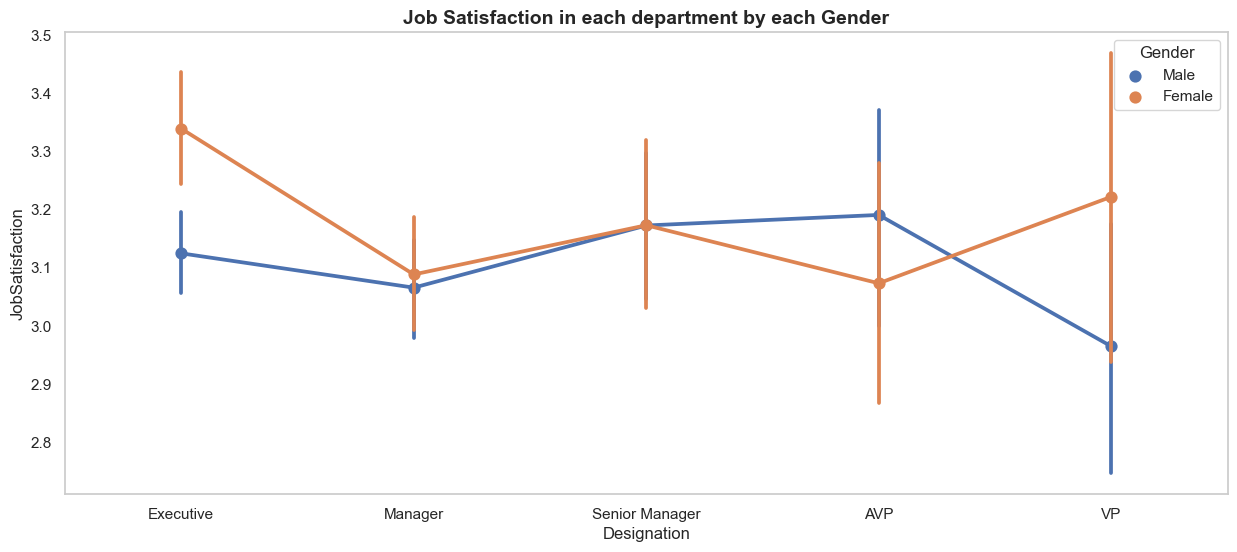

In [262]:
plt.figure(figsize=(15,6))
sns.pointplot(data=train,x='Designation',y='JobSatisfaction',hue='Gender')
plt.title("Job Satisfaction in each department by each Gender",fontweight='bold',fontsize=14)
plt.show()

1. Female employees are more satisfied in Job compared to Male employees.
2. Executive department has more job satisfaction by female employees and VP department had least job satisfaction by male employees.

## Age distribution by Gender

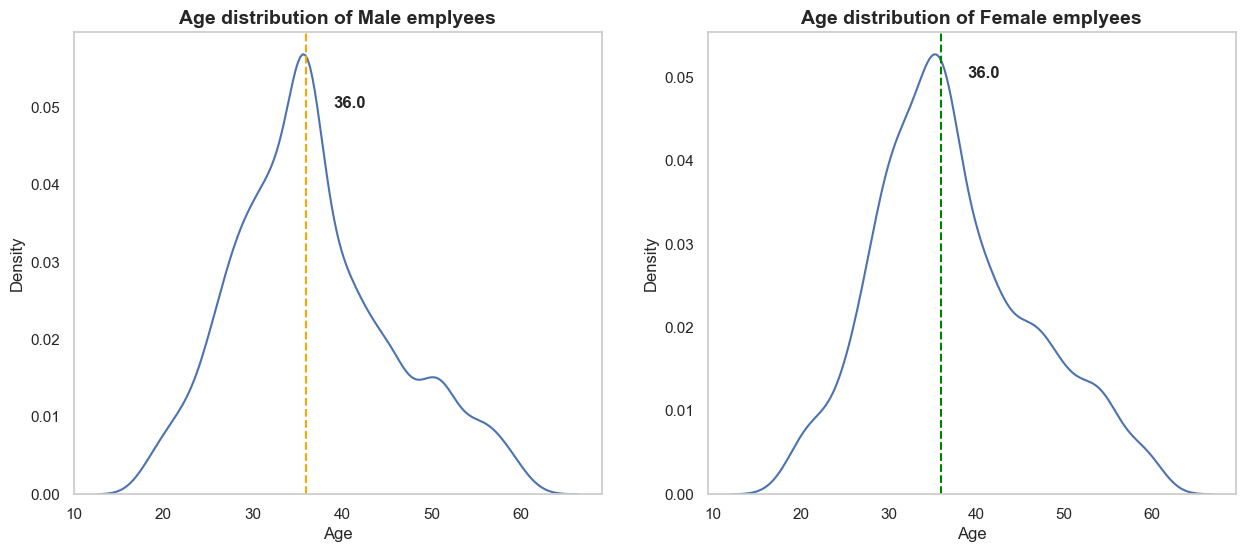

In [263]:
fig,ax=plt.subplots(1,2,figsize=(15,6),width_ratios=[1,1])


df_male = train[train['Gender']=='Male']
df_female = train[train['Gender']=='Female']

median_male_age = np.median(df_male['Age'])
median_female_age = np.median(df_female['Age'])

sns.kdeplot(data=df_male,x='Age',ax=ax[0],palette='pastel6')
ax[0].axvline(median_male_age,c='orange',linestyle='dashed')
for i in [median_male_age]:
    ax[0].text(i+3,0.05,i,fontweight='bold')
    ax[0].set_title("Age distribution of Male emplyees",fontweight='bold',fontsize=14)

sns.kdeplot(data=df_female,x='Age',ax=ax[1])
ax[1].axvline(median_female_age,c='green',linestyle='dashed')
for j in [median_female_age]:
    ax[1].text(i+3,0.05,i,fontweight='bold')
    ax[1].set_title("Age distribution of Female emplyees",fontweight='bold',fontsize=14)

##### The average age of each gender employee is same/equal.

## Monthly Income of each Gender

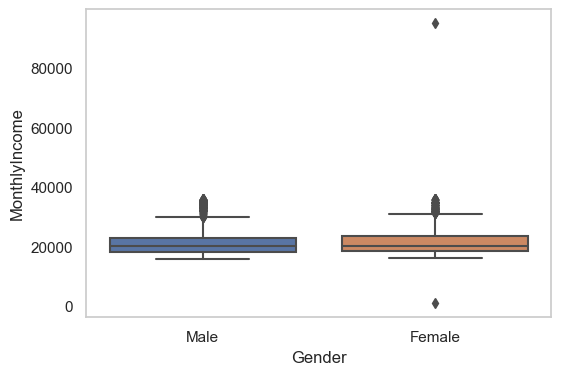

In [264]:
plt.figure(figsize=(6,4))
sns.boxplot(data=train,x='Gender',y='MonthlyIncome')
plt.show()

In [265]:
train.groupby('Gender')['MonthlyIncome'].describe().T

Gender,Female,Male
count,2040.000000,3140.000000
mean,21895.080392,21515.168153
std,4916.167396,4603.009360
min,1000.000000,16009.000000
25%,18515.000000,18334.250000
50%,20339.000000,20067.000000
75%,23609.750000,22988.750000
max,95000.000000,35999.000000


##### 1. The average salary of each gender is almost equal.
##### 2. Female employee is having highest salary of 95000 where as Male employee highest salary is 35999

## Hike in Salary for Male and Female Employees

In [266]:
train['Gender'].value_counts()

Male      3140
Female    2040
Name: Gender, dtype: int64

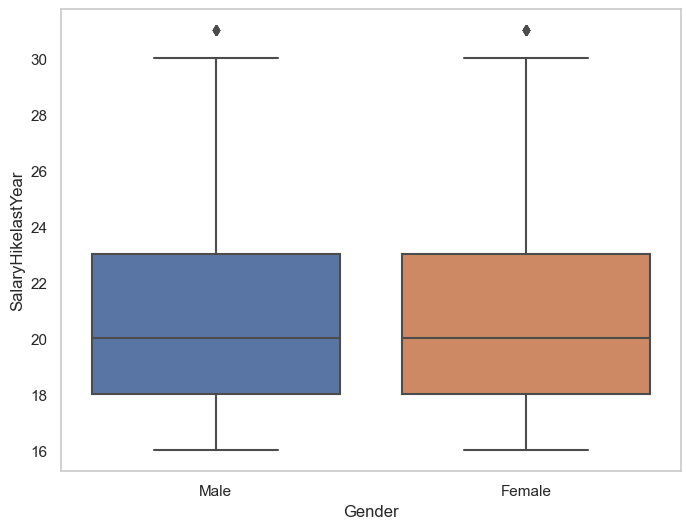

In [267]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train,y='SalaryHikelastYear',x='Gender')
plt.show()

In [268]:
train.groupby('Gender')['SalaryHikelastYear'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,2040.0,20.638725,3.670779,16.0,18.0,20.0,23.0,31.0
Male,3140.0,20.621338,3.632565,16.0,18.0,20.0,23.0,31.0


##### Hikes for female and male employees are equal. Hence, there is no disparity in providing hike to employees.

<h1><center>Attrition Analysis by each Variable</center></h1>

In [269]:
# 1. Attritin rate in each department.
# 2. Attrition rate in each role.
# 3. Attrition rate by marital status
# 4. Attrition rate vs MonthlyIncome

In [270]:
def attrition_rate(col,attrition,axs):
    df = pd.DataFrame(train.groupby(col)[attrition].mean()*100)
    df[attrition] = round(df[attrition],2)
    df = df.rename_axis(col).reset_index()
    #df = df.sort_values(by='Attrition',ascending=False)
    sns.barplot(data=df,x=col,y=attrition,ax=axs,palette='pastel6')#,order=df['Attrition'])
    axs.set_xticklabels(labels=df[col].unique(),rotation=90,fontweight='bold',fontsize=12)
    for p, count in zip(df[col].index,df[attrition]):
        axs.text(p-0.15,count+0.5,count,fontweight='bold',fontsize=16)

## Atrition Rate in Each Department

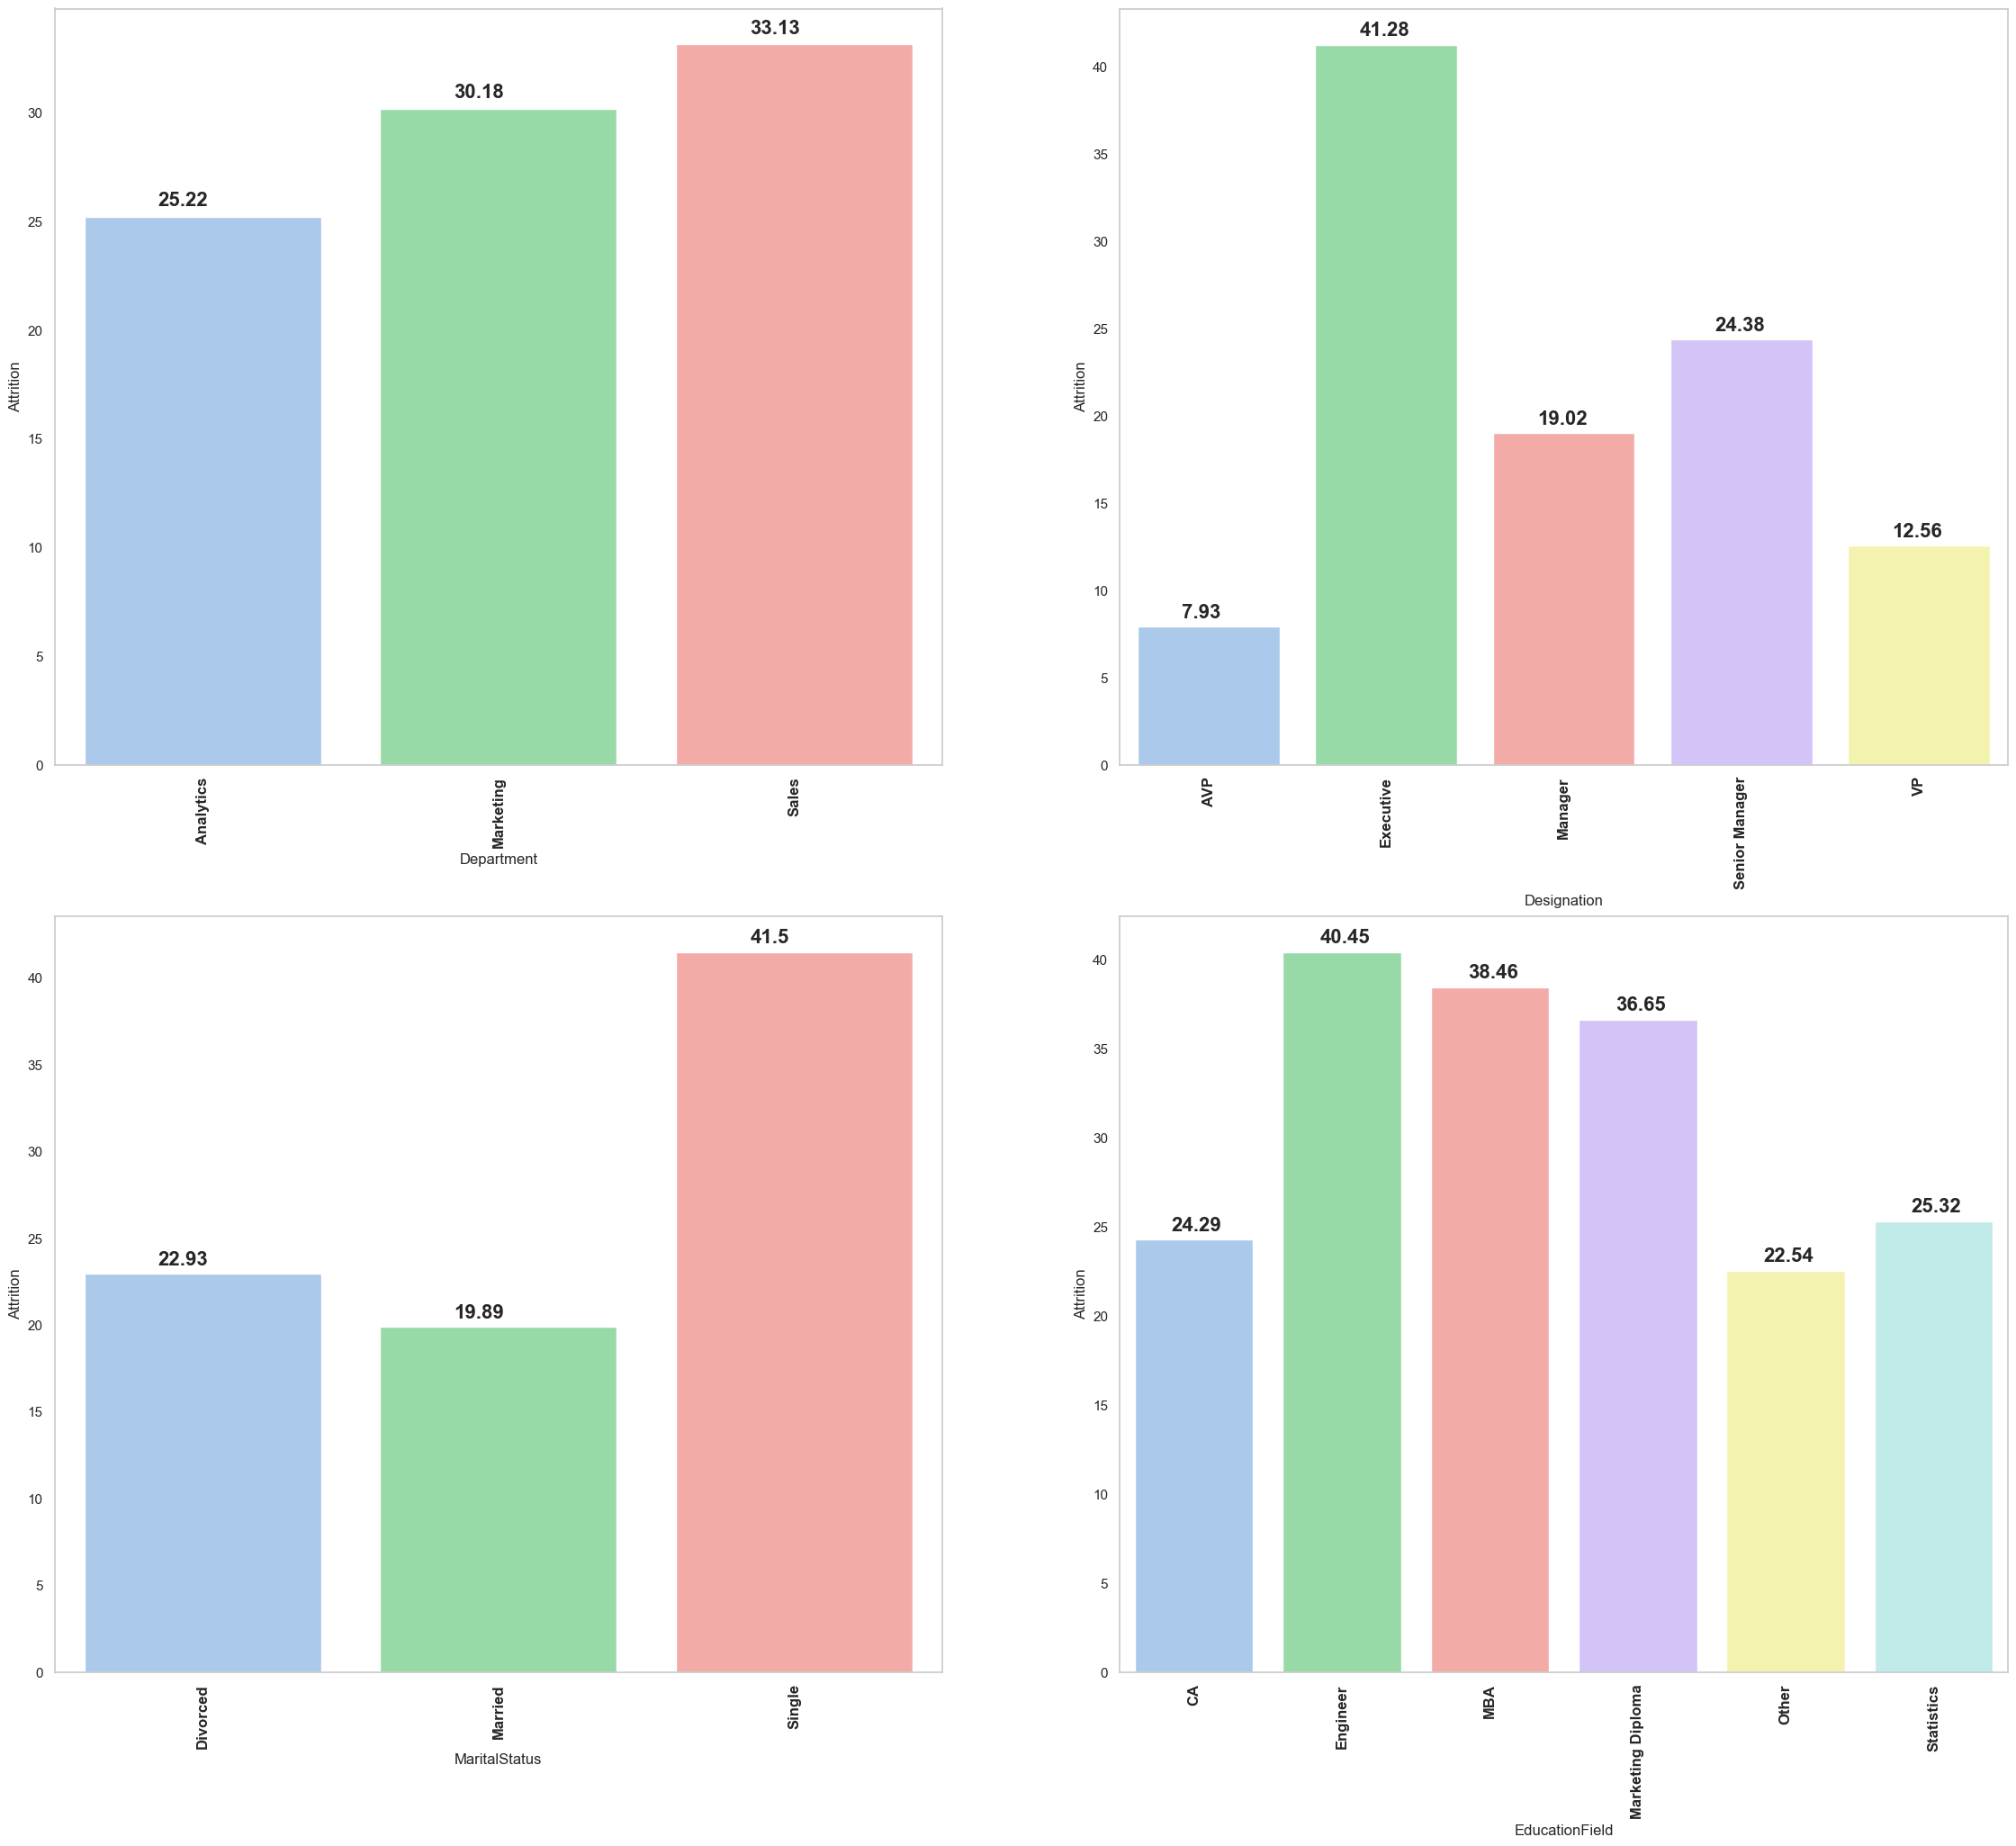

In [271]:
fig,ax=plt.subplots(2,2,figsize=(28,24),width_ratios=[1,1])
attrition_rate('Department','Attrition',ax[0,0])
attrition_rate('Designation','Attrition',ax[0,1])
attrition_rate('MaritalStatus','Attrition',ax[1,0])
attrition_rate('EducationField','Attrition',ax[1,1])


#### More employees from Sales department are leaving company followed by marketing and Analytics departments. 

##### Employees in Executive designation are more likely to leave company followed by Senior managers.

<h1><center> Impact of Income towards Attrition </center></h1>

Text(0.5, 1.0, 'Average Income of employees leaving company')

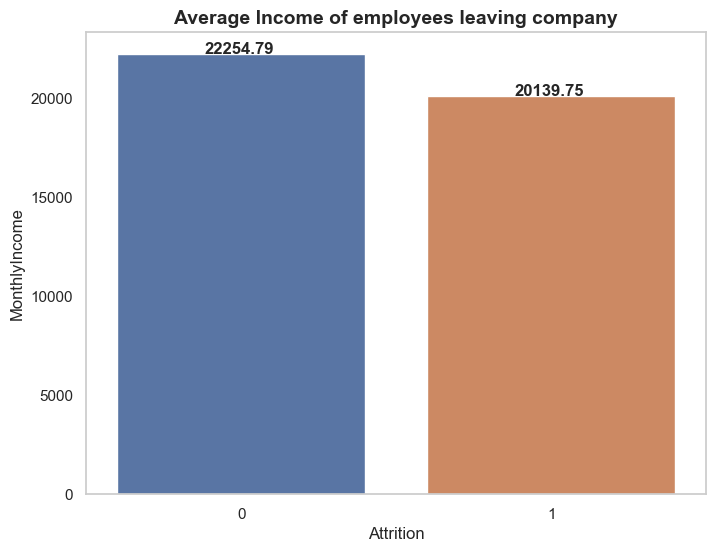

In [272]:
plt.figure(figsize=(8,6))
df = train.groupby('Attrition')['MonthlyIncome'].mean()
df = df.rename_axis('Attrition').reset_index()
df['MonthlyIncome'] = round(df['MonthlyIncome'],2)
#print(df)
sns.barplot(data=df,x='Attrition',y='MonthlyIncome')
for p,income in zip(df['Attrition'],df['MonthlyIncome']):
    plt.text(p-0.12,income,income,fontweight='bold',fontsize=12)
plt.title("Average Income of employees leaving company",fontweight='bold',fontsize=14)

##### Average Income of employees leaving company is less compared to the average income of employees who are not leaving the company.
##### There is less difference in the average income of employees who are leaving and staying in the compnay.

Text(0.5, 1.0, 'Effect of EducationField on Income')

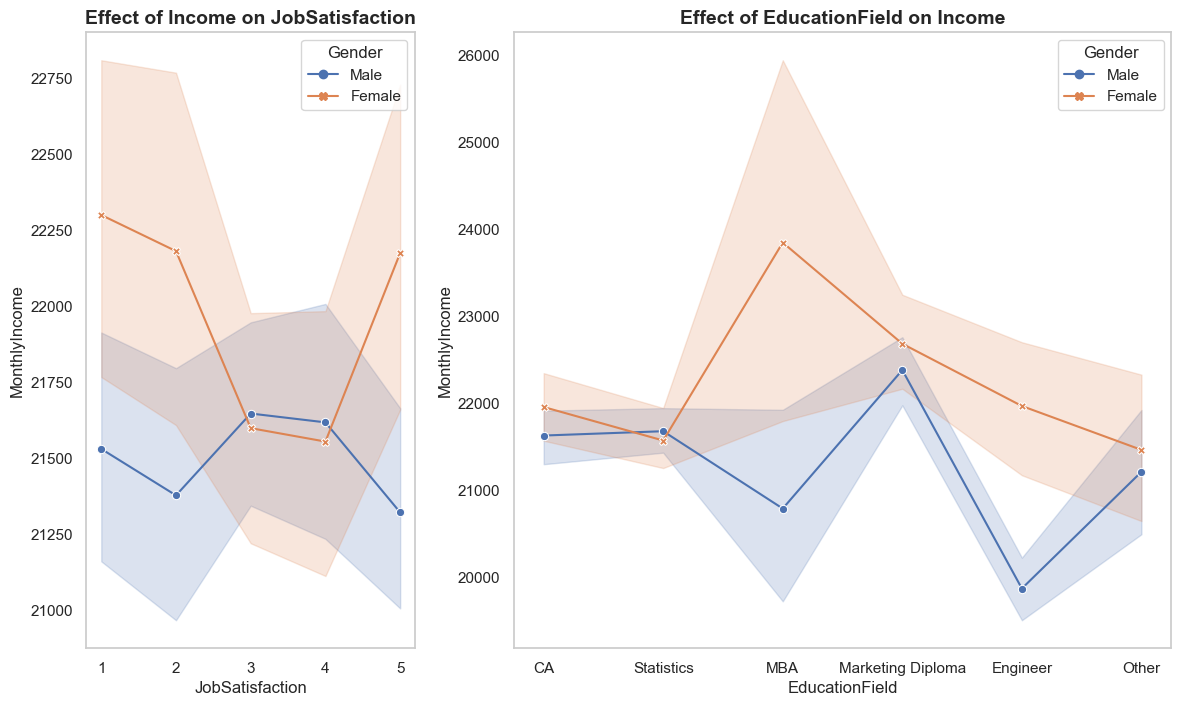

In [273]:
fig,ax = plt.subplots(1,2,figsize=(14,8),width_ratios=[1,2])
#sns.relplot(data=train,y='MonthlyIncome',x='JobSatisfaction',col='Attrition',hue='Gender',kind='line',ax=ax[0])
sns.lineplot(data=train,y='MonthlyIncome',x='JobSatisfaction',hue='Gender',style='Gender',markers=True,dashes=False,ax=ax[0])
ax[0].set_title("Effect of Income on JobSatisfaction",fontweight='bold',fontsize=14)
sns.lineplot(data=train,y='MonthlyIncome',x='EducationField',hue='Gender',style='Gender',markers=True,dashes=False,ax=ax[1])
ax[1].set_title("Effect of EducationField on Income",fontweight='bold',fontsize=14)

##### 1. I can see no effect of the income on Jobsatisfaction in both Male and Female employees.
##### 2. Female employees who have MBA as education field has high average income.
##### 3. Male employees who have Marketing Diploma as education field has high average income.
##### 4. Average income of female employees is higher compared to the average income of male employees.

## Correlation between variables

In [274]:
all_data=pd.concat([train,test],axis=0)

In [275]:
all_data.shape

(7810, 21)

In [276]:
def plot_correlation(dataset):
    plt.figure(figsize=(10,8))
    corr=dataset.corr()
    mask=np.triu(np.ones_like(corr))
    sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.1f',mask=mask)
    plt.show()

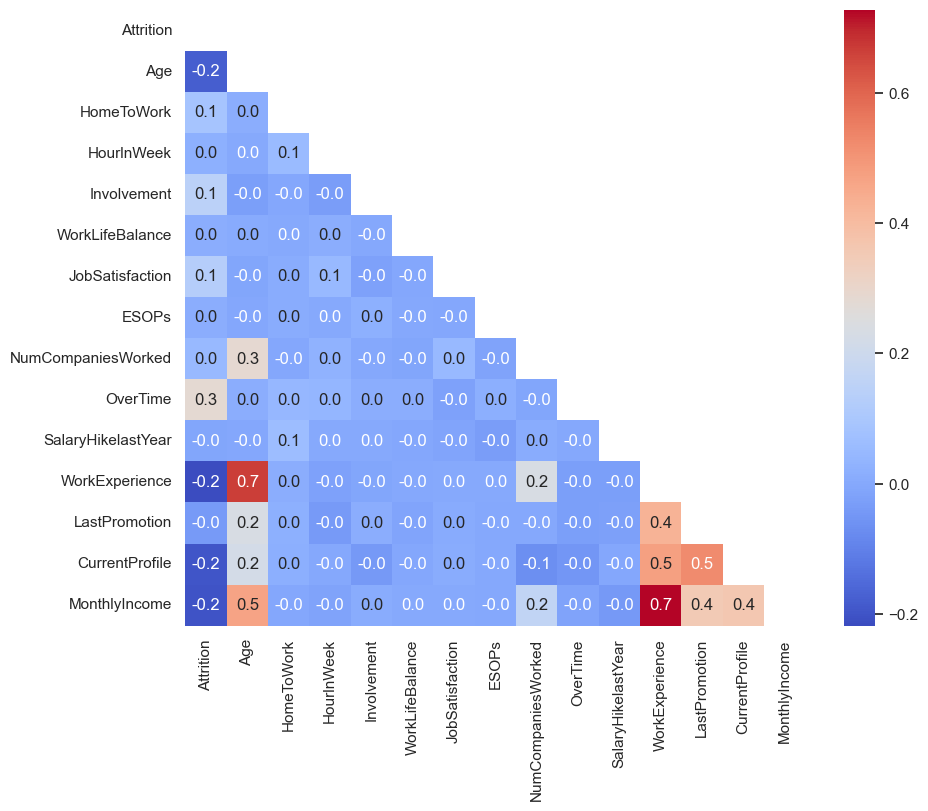

In [277]:
plot_correlation(all_data)

##### The columns Age, WorkExperience and WorkExperience,MonthlyIncome are correlated with correlation coefficient 0.7.
##### No columns are having correlation coefficient of 0.8 or above.
##### Let's drop Age column to avoid multicollinearity. I believe WorkExperience and MonthlyIncome are required for analysing data. Hence, let's not drop one of those columns.

In [278]:
train.drop(['Age'],axis=1,inplace=True)
test.drop(['Age'],axis=1,inplace=True)

## Encoding categorical variables

In [279]:
train = pd.get_dummies(train,columns=categorical_cols,drop_first=True)
test = pd.get_dummies(test,columns=categorical_cols,drop_first=True)

In [280]:
train.head()

,Attrition,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,0,5.0,69.0,1,1,1,1,1,1,20.0,7.0,2.0,3.0,18932.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1,5.0,62.0,4,3,2,0,8,0,20.0,4.0,1.0,3.0,18785.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,0,5.0,45.0,5,3,2,1,3,0,26.0,12.0,1.0,3.0,22091.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,0,10.0,32.0,3,2,4,1,1,0,23.0,5.0,1.0,3.0,20302.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,27.0,49.0,3,4,4,1,8,0,21.0,12.0,1.0,9.0,21674.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### Split the data into dependent and independent variables

In [281]:
x = train.drop(['Attrition'],axis=1)
y = train['Attrition']

## Check for Imbalanced Data

In [282]:
train['Attrition'].value_counts()

0    3735
1    1445
Name: Attrition, dtype: int64

##### The data is imbalanced. Let's balance the data using over sampling technique.

In [283]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

In [284]:
x_over,y_over = ros.fit_resample(x,y)

In [285]:
y_over.value_counts()

0    3735
1    3735
Name: Attrition, dtype: int64

## Split the data into train and test 

In [286]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,random_state=90,test_size=0.25)

## Building the Classifier Model

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [288]:
rfc = RandomForestClassifier()
lr = LogisticRegression()
xgbc = XGBClassifier()
svc = LinearSVC()

In [289]:
rfc.fit(x_train,y_train)
lr.fit(x_train,y_train)
xgbc.fit(x_train,y_train)
svc.fit(x_train,y_train)

LinearSVC()

## Predict the Classification

In [290]:

rfc_y_train_pred = rfc.predict(x_train)
rfc_y_test_pred = rfc.predict(x_test)

lr_y_train_pred = lr.predict(x_train)
lr_y_test_pred = lr.predict(x_test)

xgbc_y_train_pred = xgbc.predict(x_train)
xgbc_y_test_pred = xgbc.predict(x_test)

svc_y_train_pred = svc.predict(x_train)
svc_y_test_pred = svc.predict(x_test)

## Evaluate the Classifier Model

In [291]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [292]:
print("Classification Report of Random Forest Model for train data : ",classification_report(rfc_y_train_pred,y_train))
print("Classification Report of Random Forest Model for test data : ",classification_report(rfc_y_test_pred,y_test))
print("************************************************************************************")
print("Classification Report of Logistic Regression Model for train data : ",classification_report(lr_y_train_pred,y_train))
print("Classification Report of Logistic Regression Model for test data : ",classification_report(lr_y_test_pred,y_test))
print("************************************************************************************")
print("Classification Report of XGBoost Classifier Model for train data : ",classification_report(xgbc_y_train_pred,y_train))
print("Classification Report of XGBoost Classifier Model for test data : ",classification_report(xgbc_y_test_pred,y_test))
print("************************************************************************************")
print("Classification Report of SVC Model for train data : ",classification_report(svc_y_train_pred,y_train))
print("Classification Report of SVC Model for test data : ",classification_report(svc_y_test_pred,y_test))

Classification Report of Random Forest Model for train data :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2798
           1       1.00      1.00      1.00      2804

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602

Classification Report of Random Forest Model for test data :                precision    recall  f1-score   support

           0       0.98      1.00      0.99       923
           1       1.00      0.98      0.99       945

    accuracy                           0.99      1868
   macro avg       0.99      0.99      0.99      1868
weighted avg       0.99      0.99      0.99      1868

************************************************************************************
Classification Report of Logistic Regression Model for train data :                precision    recall  f1-score   support

           0

In [293]:
print("Confusion matrix of Random Forest Model for train data : ")
print(confusion_matrix(y_train,rfc_y_train_pred))
print("Confusion matrix of Random Forest Model for test data : ")
print(confusion_matrix(y_test,rfc_y_test_pred))
print("************************************************************************************")
print("Confusion matrix of Linear Regression Model for train data : ")
print(confusion_matrix(y_train,lr_y_train_pred))
print("Confusion matrix of Linear Regression Model for test data : ")
print(confusion_matrix(y_test,lr_y_test_pred))
print("************************************************************************************")
print("Confusion matrix of XGBoost Model for train data : ")
print(confusion_matrix(y_train,xgbc_y_train_pred))
print("Confusion matrix of XGBoost Model for test data : ")
print(confusion_matrix(y_test,xgbc_y_test_pred))
print("************************************************************************************")
print("Confusion matrix of SVC Model for train data : ")
print(confusion_matrix(y_train,svc_y_train_pred))
print("Confusion matrix of SVC Model for test data : ")
print(confusion_matrix(y_test,svc_y_test_pred))

Confusion matrix of Random Forest Model for train data : 
[[2798    0]
 [   0 2804]]
Confusion matrix of Random Forest Model for test data : 
[[921  16]
 [  2 929]]
************************************************************************************
Confusion matrix of Linear Regression Model for train data : 
[[1795 1003]
 [ 731 2073]]
Confusion matrix of Linear Regression Model for test data : 
[[611 326]
 [257 674]]
************************************************************************************
Confusion matrix of XGBoost Model for train data : 
[[2798    0]
 [   0 2804]]
Confusion matrix of XGBoost Model for test data : 
[[923  14]
 [  2 929]]
************************************************************************************
Confusion matrix of SVC Model for train data : 
[[2798    0]
 [2804    0]]
Confusion matrix of SVC Model for test data : 
[[937   0]
 [931   0]]


#### We can observe that Random Forest and XGBoost algorithms are performing good on the given data.

### Crossfold Validation

In [294]:
from sklearn.model_selection import cross_val_score

In [295]:
rfc_accuracy = cross_val_score(rfc,x_train,y_train,cv=10)
xgb_accuracy = cross_val_score(xgbc,x_train,y_train,cv=10)

In [296]:
print("Random Forest Model Accuracy : ",rfc_accuracy)
print("Random Forest Model Maximum Accuracy : ",rfc_accuracy.max())
print("Random Forest Model Mean Accuracy : ",rfc_accuracy.mean())

Random Forest Model Accuracy :  [0.98752228 0.99286988 0.99285714 0.99464286 0.98392857 0.99642857
 0.9875     0.99107143 0.99285714 0.99107143]
Random Forest Model Maximum Accuracy :  0.9964285714285714
Random Forest Model Mean Accuracy :  0.9910749299719888


In [297]:
print("XGBoost Model Accuracy : ",xgb_accuracy)
print("XGBoost Model Maximum Accuracy : ",xgb_accuracy.max())
print("XGBoost Model Mean Accuracy : ",xgb_accuracy.mean())

XGBoost Model Accuracy :  [0.98573975 0.99286988 0.99285714 0.98214286 0.9875     0.9875
 0.97857143 0.9875     0.98571429 0.98035714]
XGBoost Model Maximum Accuracy :  0.9928698752228164
XGBoost Model Mean Accuracy :  0.9860752482811306


####  Random Forest Model and XGBoost Model both are performing well. Considering RandomForest Model to predict the outcome.

In [299]:
## Predict the Attrition for data
y_test=rfc.predict(test)
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [300]:
submission['Attrition']=y_test

In [304]:
submission.head()

,EmployeeID,Attrition
0,6110001,1
1,6110002,1
2,6110003,0
3,6110004,1
4,6110005,0


In [308]:
submission.to_csv('Attrition_Submission.csv',index=False)